# Importing mushrooms dataset and performing preliminary checks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('mushrooms.csv')
data.shape

(8124, 23)

In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
pd.pandas.set_option('display.max_columns',None)

In [6]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**As seen above, there are no nulls. So, now, for encoding: target column 'class' will be label encoded with edible(e) being given a value of 0, and poisonous(p) being given a value of 1. All the other columns will be one-hot encoded.**

In [7]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
4208+3916

8124

In [9]:
def label_fn (row) :
    if row['class'] == 'e':
        return 0
    return 1
data['class_encoded']=data.apply(lambda row: label_fn(row), axis=1)


In [10]:
data.head()
#scrolling to the rightmost, we can see the label encoded column

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_encoded
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,1
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,0


# One hot encoding for the feature columns

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat',
       'class_encoded'],
      dtype='object')

In [13]:
X=data.drop(['class','class_encoded'], axis = 1)

In [14]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [15]:
X=pd.get_dummies(X,columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])

In [16]:
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


**Now, we have the features which have been encoded. Proceeding to create a classification model**

In [17]:
y=data['class_encoded']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Gaussian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv.fit(X_train,y_train)

GaussianNB()

In [21]:
from sklearn.metrics import accuracy_score
y_pred = nv.predict(X_test)
accuracy_score(y_test,y_pred)

0.96

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Precision is:  0.9232585596221959
Recall is:  1.0
f1 score is:  0.960098219766728


In [23]:
confusion_matrix(y_test,y_pred)

array([[778,  65],
       [  0, 782]], dtype=int64)

In [37]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9993606138107417

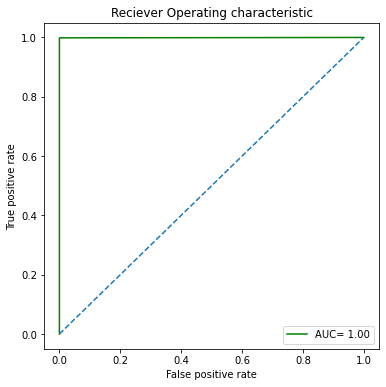

In [38]:
plt.figure(figsize=(6,6))
plt.title('Reciever Operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='green', label= 'AUC= %0.2f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1], linestyle="dashed")
plt.axis('tight')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
print("Accuracy with the Decision tree model is: ", accuracy_score(y_test,y_pred_dt))
print("Precision is: ", precision_score(y_test,y_pred_dt))
print("Recall is: ", recall_score(y_test,y_pred_dt))
print("f1 score is: ", f1_score(y_test,y_pred_dt))

Accuracy with the Decision tree model is:  1.0
Precision is:  1.0
Recall is:  1.0
f1 score is:  1.0


In [25]:
confusion_matrix(y_test,y_pred_dt)

array([[843,   0],
       [  0, 782]], dtype=int64)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(solver='lbfgs', max_iter=500)
logit_model.fit(X_train,y_train)
y_pred_logit=logit_model.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred_logit))
print("Precision is: ", precision_score(y_test,y_pred_logit))
print("Recall is: ", recall_score(y_test,y_pred_logit))
print("f1 score is: ", f1_score(y_test,y_pred_logit))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
f1 score is:  1.0


In [28]:
confusion_matrix(y_test,y_pred_logit)

array([[843,   0],
       [  0, 782]], dtype=int64)

# KNN

Text(0, 0.5, 'accuracy')

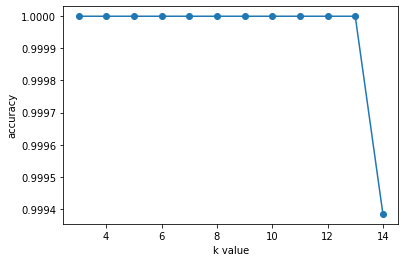

In [30]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [31]:
classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred_knn))
print("Precision is: ", precision_score(y_test,y_pred_knn))
print("Recall is: ", recall_score(y_test,y_pred_knn))
print("f1 score is: ", f1_score(y_test,y_pred_knn))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
f1 score is:  1.0


In [32]:
confusion_matrix(y_test,y_pred_knn)

array([[843,   0],
       [  0, 782]], dtype=int64)

# Categorical Naive Bayes

In [35]:
from sklearn.naive_bayes import CategoricalNB
cl_cat = CategoricalNB()
y_pred_cat=cl_cat.fit(X_train,y_train).predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred_cat))
print("Precision is: ", precision_score(y_test,y_pred_cat))
print("Recall is: ", recall_score(y_test,y_pred_cat))
print("f1 score is: ", f1_score(y_test,y_pred_cat))

Accuracy is:  0.936
Precision is:  0.9774647887323944
Recall is:  0.887468030690537
f1 score is:  0.9302949061662199


In [36]:
confusion_matrix(y_test,y_pred_cat)

array([[827,  16],
       [ 88, 694]], dtype=int64)